In [3]:
import os
import warnings
import numpy as np
import datetime as dt
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [4]:
energy = pd.read_csv("energy.csv")
energy.head(3)

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000


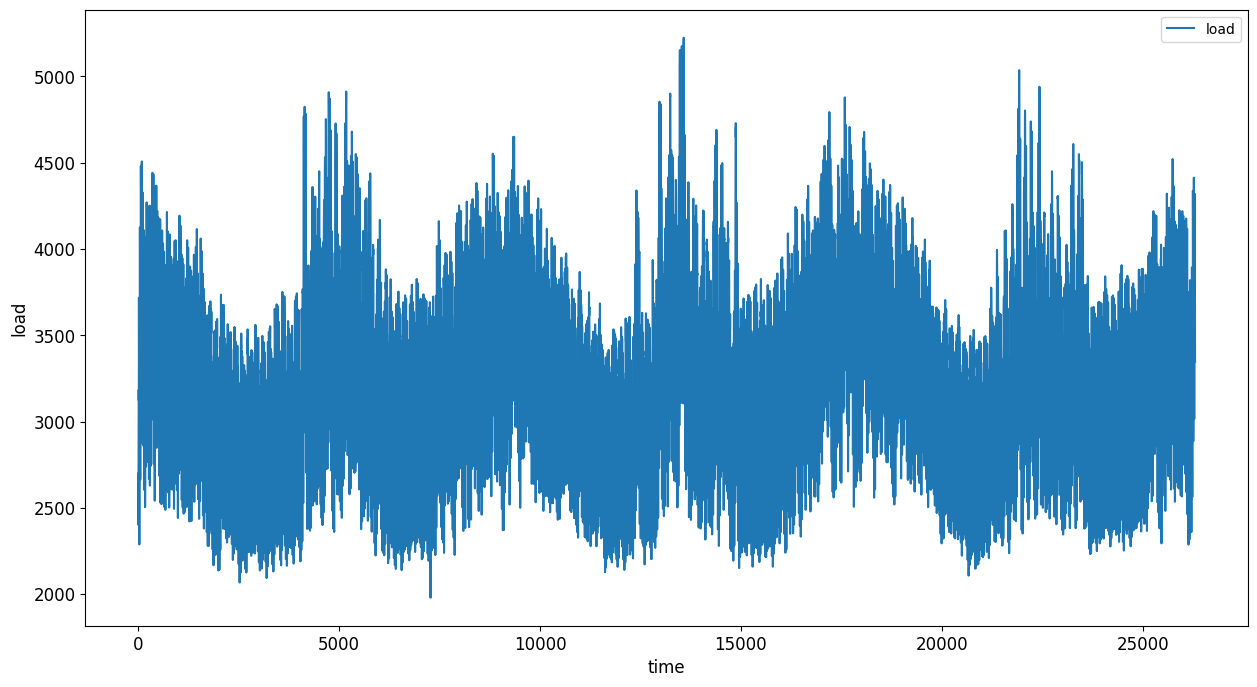

In [5]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('time', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

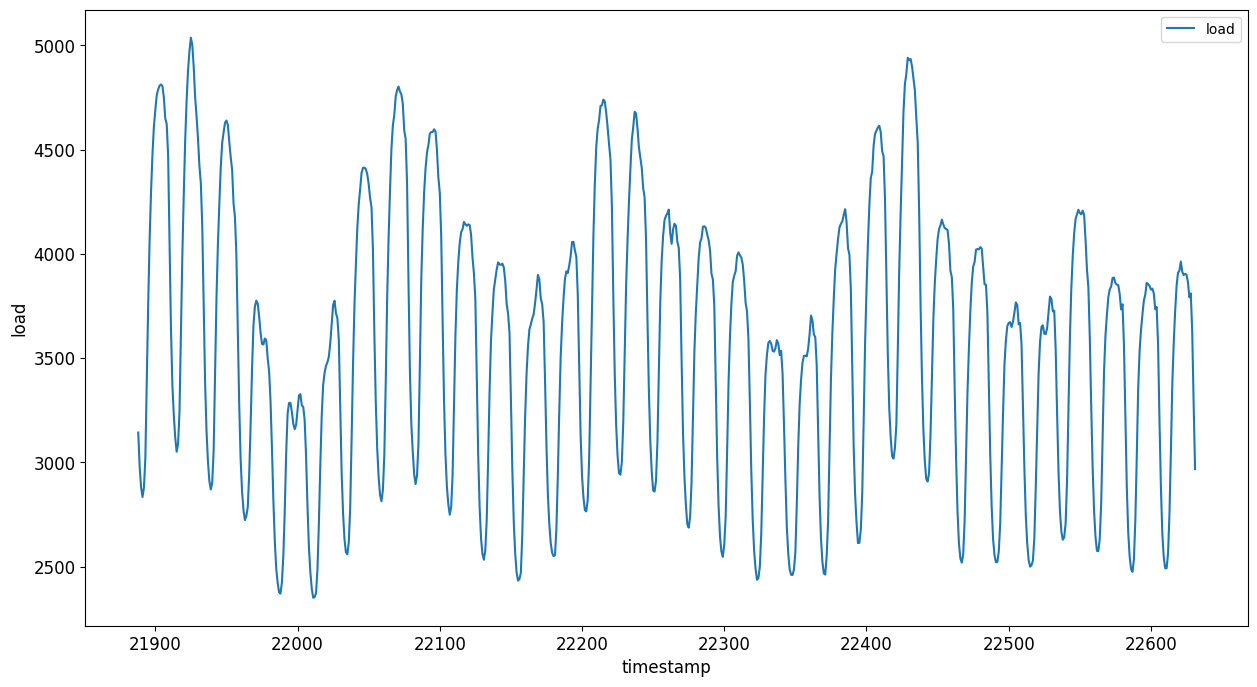

In [6]:
energy["timestamp"] =pd.to_datetime(energy["timestamp"])
july = energy[(energy['timestamp'].dt.month == 7) & (energy['timestamp'].dt.year == 2014 )]
july.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

Allocate a two-month period from September 1 to October 31, 2014 to the training set. The test set will include the two-month period of November 1 to December 31, 2014

In [39]:
train = energy[((energy['timestamp'].dt.month == 9) | (energy['timestamp'].dt.month == 10)) & (energy['timestamp'].dt.year == 2014 )]
test = energy[((energy['timestamp'].dt.month == 11) | (energy['timestamp'].dt.month == 12)) & (energy['timestamp'].dt.year == 2014 )]

Visualize

In [17]:
result = train.rename(columns={'load': 'train'}).join(test.rename(columns={'load': 'test'}), how='outer', lsuffix='_train', rsuffix='_test')
result.head(3000)

,timestamp_train,train,temp_train,timestamp_test,test,temp_test
23376,2014-09-01 00:00:00,2886.0,71.000000,NaT,NaN,NaN
23377,2014-09-01 01:00:00,2768.0,70.000000,NaT,NaN,NaN
23378,2014-09-01 02:00:00,2699.0,69.333333,NaT,NaN,NaN
23379,2014-09-01 03:00:00,2681.0,68.333333,NaT,NaN,NaN
23380,2014-09-01 04:00:00,2690.0,68.333333,NaT,NaN,NaN
...,...,...,...,...,...,...
26299,NaT,NaN,NaN,2014-12-31 19:00:00,4012.0,18.000000
26300,NaT,NaN,NaN,2014-12-31 20:00:00,3856.0,16.666667
26301,NaT,NaN,NaN,2014-12-31 21:00:00,3671.0,17.000000
26302,NaT,NaN,NaN,2014-12-31 22:00:00,3499.0,15.333333


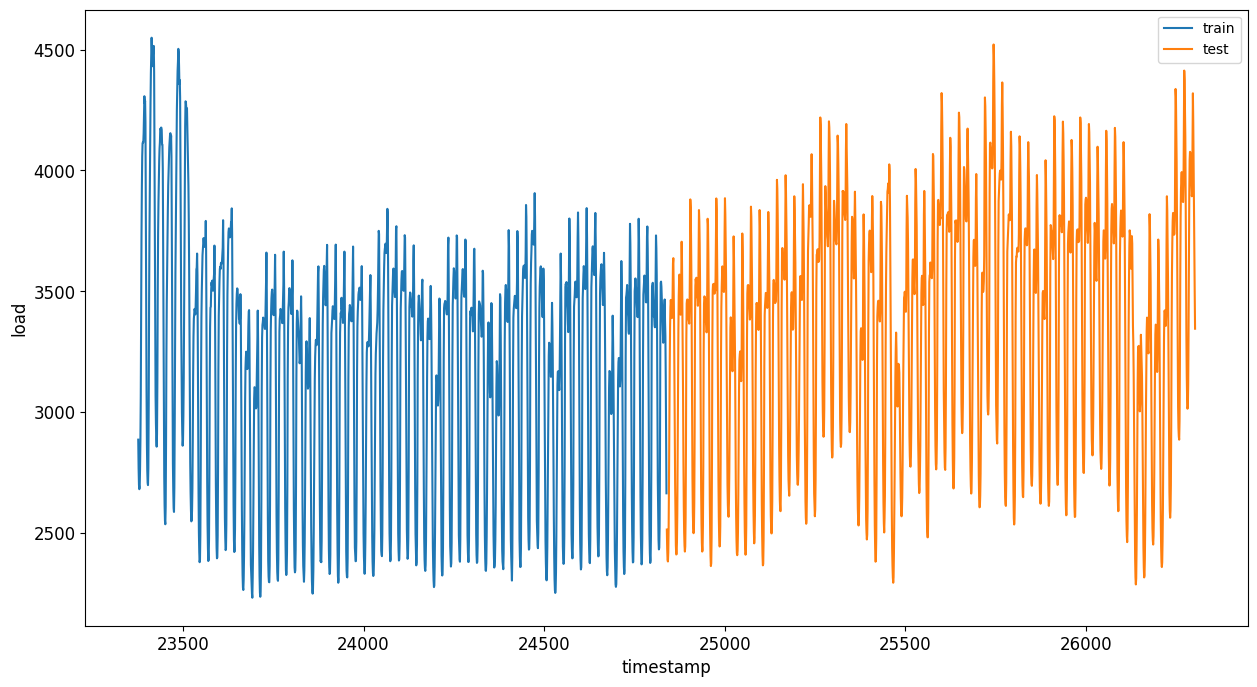

In [18]:
result.plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

Filter your dataset to only include the time periods and columns you need, and scaling to ensure the data is projected in the interval 0,1.

In [40]:
train = train[['load']]
test = test[['load']]
print(f"Shape of train: {train.shape}, Shape of test: {test.shape} ")

Shape of train: (1464, 1), Shape of test: (1464, 1) 


In [41]:
scaler = MinMaxScaler()
train['load'] = scaler.fit_transform(train)
train.head(10)

,load
23376,0.282262
23377,0.231334
23378,0.201554
23379,0.193785
23380,0.197669
23381,0.229607
23382,0.280535
23383,0.360811
23384,0.512300
23385,0.644799


In [42]:
test['load'] = scaler.fit_transform(test)
test.head(10)

,load
24840,0.101611
24841,0.065801
24842,0.046106
24843,0.042525
24844,0.059087
24845,0.104297
24846,0.191137
24847,0.305730
24848,0.403760
24849,0.478514


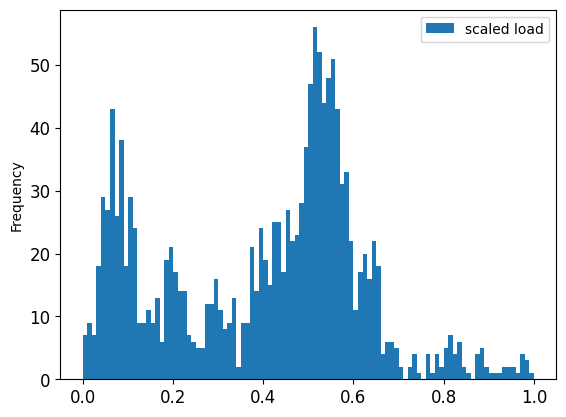

In [43]:
train.rename(columns={'load':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()